In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
time_data=pd.read_csv("C:/Users/kushal/Downloads/hcl.csv")
time_data.head(10)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-11,HCLTECH,EQ,580.00,1550.00,1725.00,1492.00,1560.00,1554.45,1582.72,1192200,1.886915e+14,NaN,NaN,NaN
1,2000-01-12,HCLTECH,EQ,1554.45,1560.00,1678.85,1560.00,1678.85,1678.85,1657.05,344850,5.714349e+13,NaN,NaN,NaN
2,2000-01-13,HCLTECH,EQ,1678.85,1790.00,1813.20,1781.00,1813.20,1813.20,1804.69,53000,9.564880e+12,NaN,NaN,NaN
3,2000-01-14,HCLTECH,EQ,1813.20,1958.30,1958.30,1835.00,1958.30,1958.30,1939.90,270950,5.256169e+13,NaN,NaN,NaN
4,2000-01-17,HCLTECH,EQ,1958.30,2115.00,2115.00,1801.65,1801.65,1801.65,1990.55,428800,8.535473e+13,NaN,NaN,NaN
5,2000-01-18,HCLTECH,EQ,1801.65,1730.55,1815.00,1657.55,1775.00,1774.50,1716.39,359900,6.177280e+13,NaN,NaN,NaN
6,2000-01-19,HCLTECH,EQ,1774.50,1815.00,1889.00,1760.00,1842.80,1851.15,1842.81,316050,5.824204e+13,NaN,NaN,NaN
7,2000-01-20,HCLTECH,EQ,1851.15,1865.00,1865.00,1750.00,1753.50,1757.85,1801.37,204700,3.687409e+13,NaN,NaN,NaN
8,2000-01-21,HCLTECH,EQ,1757.85,1761.00,1815.00,1705.00,1786.00,1781.35,1774.01,282150,5.005360e+13,NaN,NaN,NaN
9,2000-01-24,HCLTECH,EQ,1781.35,1834.90,1923.90,1795.00,1923.90,1923.90,1875.34,328650,6.163317e+13,NaN,NaN,NaN


In [3]:
hcl_data=time_data.dropna()
hcl_data.shape

(2456, 15)

In [4]:
hcl_data.index=pd.to_datetime(hcl_data.Date)
hcl_data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
2011-06-01,2011-06-01,HCLTECH,EQ,514.80,511.40,516.00,509.00,514.75,514.40,512.70,287699,1.475043e+13,4845.0,146731.0,0.5100
2011-06-02,2011-06-02,HCLTECH,EQ,514.40,509.00,515.25,508.70,514.75,513.70,512.86,307689,1.578028e+13,6701.0,144265.0,0.4689
2011-06-03,2011-06-03,HCLTECH,EQ,513.70,512.05,517.50,508.90,513.70,512.35,513.58,379167,1.947326e+13,9447.0,143384.0,0.3782
2011-06-06,2011-06-06,HCLTECH,EQ,512.35,508.05,514.00,505.05,509.10,509.50,508.07,285294,1.449495e+13,5368.0,100251.0,0.3514
2011-06-07,2011-06-07,HCLTECH,EQ,509.50,504.05,514.95,504.05,511.95,511.80,510.77,403694,2.061968e+13,8530.0,262636.0,0.6506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,2021-04-26,HCLTECH,EQ,955.65,940.00,954.50,923.05,930.00,928.80,931.70,19619972,1.827997e+15,311431.0,9218485.0,0.4699
2021-04-27,2021-04-27,HCLTECH,EQ,928.80,931.00,938.55,923.40,930.30,928.85,928.06,6406825,5.945938e+14,180458.0,3233276.0,0.5047
2021-04-28,2021-04-28,HCLTECH,EQ,928.85,931.20,935.85,921.75,925.90,923.80,926.63,6845677,6.343403e+14,228230.0,3890178.0,0.5683


In [5]:
hcl_data_agl=hcl_data['Prev Close']['2013-01-01':'2013-12-02']
hcl_data_agl.shape

(230,)

In [6]:
#one year data of entries,beware of holidays as well
hcl_data_agl.describe()

count     230.000000
mean      852.953478
std       156.484472
min       618.700000
25%       736.350000
50%       777.450000
75%      1023.962500
max      1161.150000
Name: Prev Close, dtype: float64

Text(0, 0.5, 'Stock price for hcltech')

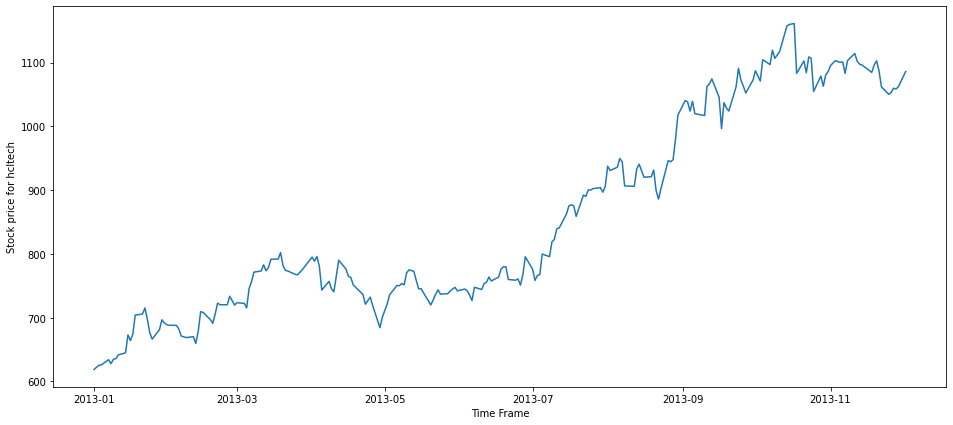

In [7]:
plt.figure(figsize=(16,7))
fig=plt.figure(1)
ax1=fig.add_subplot(111)
ax1.plot(hcl_data_agl)
ax1.set_xlabel("Time Frame")
ax1.set_ylabel("Stock price for hcltech")

In [8]:
rollmean=hcl_data_agl.rolling(12).mean()
rollstd=hcl_data_agl.rolling(12).std()


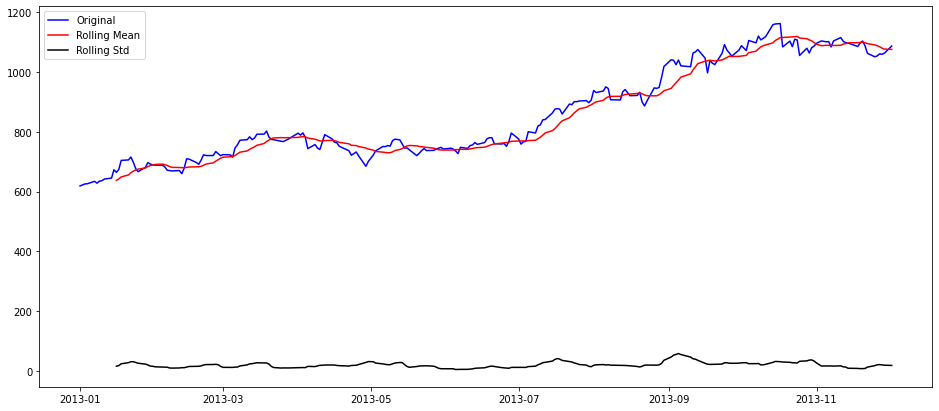

In [9]:
plt.figure(figsize=(16,7))
fig=plt.figure(1)
orig=plt.plot(hcl_data_agl,color='blue',label='Original')
mean=plt.plot(rollmean,color='red',label='Rolling Mean')
std=plt.plot(rollstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.show()

In [10]:
#for a time series model to be constant over time, the mean and std should be constant
# from the above series plot std is constant but the rolling mean isn't constant
#adfueller test also can be used to test if the series is stationary.



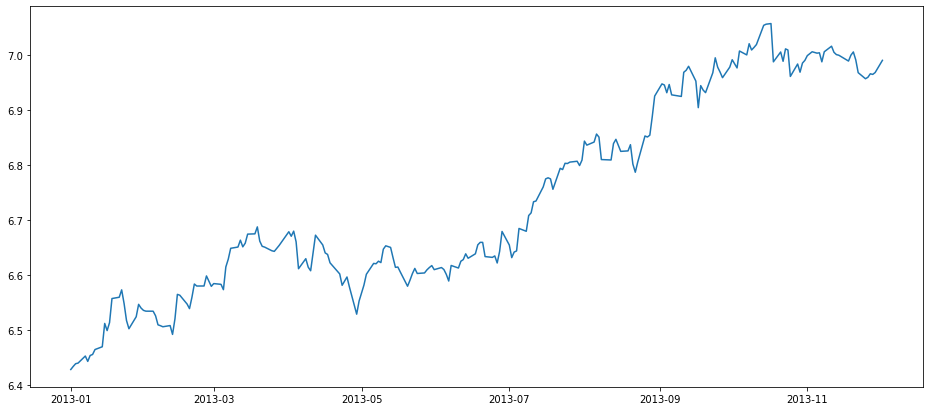

In [11]:
#making series stationary
import numpy as np
plt.figure(figsize=(16,7))
fig=plt.figure(1)
ts_log=np.log(hcl_data_agl)
plt.plot(ts_log)

<ipython-input-12-59fcd07c6d0e>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition=seasonal_decompose(ts_log,freq=1,model='mutiplicative')


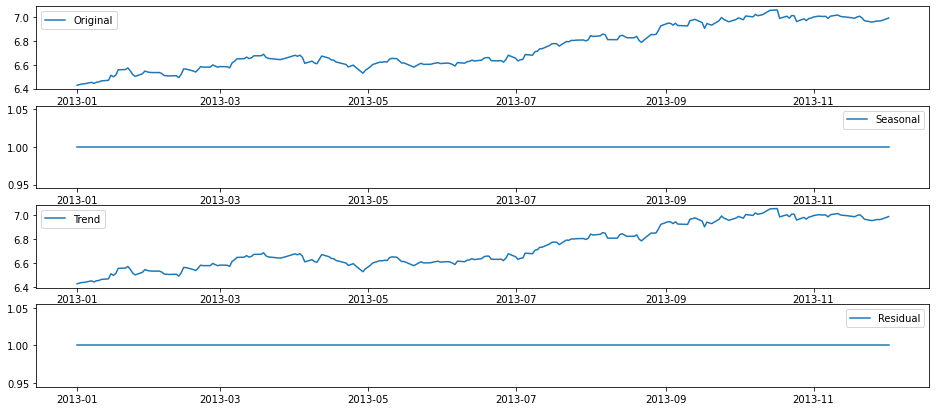

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(ts_log,freq=1,model='mutiplicative')
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.figure(figsize=(16,7))
fig=plt.figure(1)
plt.subplot(411)
plt.plot(ts_log,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')
plt.show()

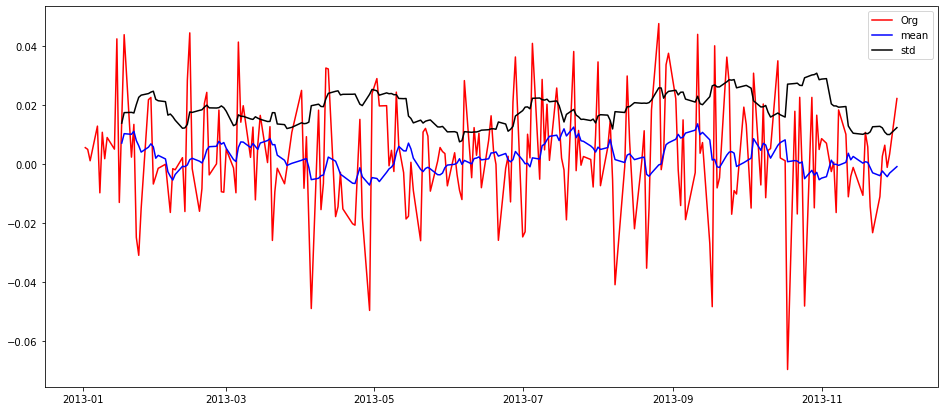

In [13]:
#trying out the differencing time series 
plt.figure(figsize=(16,7))
fig=plt.figure(1)
ts_log_diff=ts_log-ts_log.shift(1)
rolmean=ts_log_diff.rolling(12).mean()
rolstd=ts_log_diff.rolling(12).std()
org=plt.plot(ts_log_diff,color='red',label='Org')
mean=plt.plot(rolmean,color='blue',label='mean')
std=plt.plot(rolstd,color='black',label='std')
plt.legend(loc='best')
plt.show()

In [14]:
# we can see that there is no upward pattern for mean and standard deviation

In [15]:
# this forecast looks stationary-> you canperform adfueller test to check
# we can plot acf and pacf 

c:\python-3.9\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\python-3.9\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

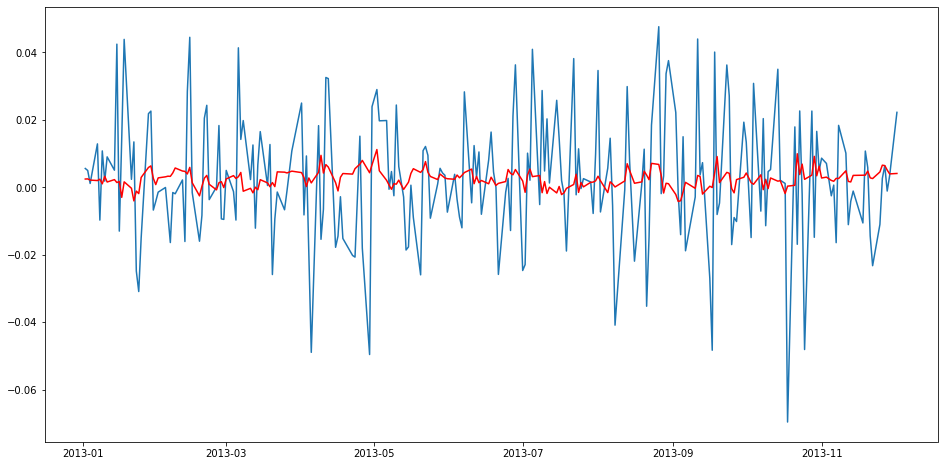

In [16]:
from statsmodels.tsa.arima_model import ARIMA
plt.figure(figsize=(16,8))
model=ARIMA(ts_log,order=(2,1,2))
results_arima=model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_arima.fittedvalues,color='red')

In [17]:
#blue line shows the actual graph, the red line shows the forecasted plot line
# taking back values to the original scale
arima_diff_predictions=pd.Series(results_arima.fittedvalues,copy=True)
print(arima_diff_predictions)

Date
2013-01-02    0.002432
2013-01-03    0.002471
2013-01-04    0.002117
2013-01-07    0.001981
2013-01-08    0.002377
                ...   
2013-11-26    0.006541
2013-11-27    0.006422
2013-11-28    0.005091
2013-11-29    0.003951
2013-12-02    0.004084
Length: 229, dtype: float64


In [18]:
arima_diff_predictions_cumsum=arima_diff_predictions.cumsum()
print(arima_diff_predictions_cumsum.head())


arima_log_prediction=pd.Series(ts_log,index=ts_log.index)
arima_log_prediction=arima_log_prediction.add(arima_diff_predictions_cumsum,fill_value=0)
print(arima_log_prediction)

Date
2013-01-02    0.002432
2013-01-03    0.004903
2013-01-04    0.007021
2013-01-07    0.009002
2013-01-08    0.011379
dtype: float64
Date
2013-01-01    6.427621
2013-01-02    6.435614
2013-01-03    6.443055
2013-01-04    6.446291
2013-01-07    6.461129
                ...   
2013-11-26    7.498413
2013-11-27    7.511224
2013-11-28    7.515182
2013-11-29    7.522529
2013-12-02    7.548819
Length: 230, dtype: float64


Text(0.5, 1.0, 'RMSE: 385.9247')

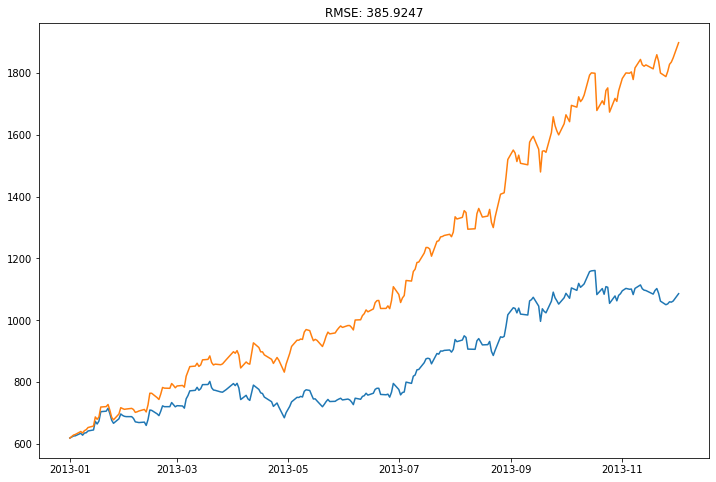

In [19]:
plt.figure(figsize=(12,8))
predictions_arima_model=np.exp(arima_log_prediction)
plt.plot(hcl_data_agl)
plt.plot(predictions_arima_model)

plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_arima_model-hcl_data_agl)**2)/len(hcl_data_agl)))

In [26]:

import pmdarima as pm
def arimamodel(timeseries):
    automodel=pm.auto_arima(timeseries,seasonal=True,trace=True)
    return automodel

arimamodel(ts_log)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1163.846, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1167.424, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1165.456, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1165.465, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1165.525, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1163.485, Time=0.17 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.663 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

c:\python-3.9\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
c:\python-3.9\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
c:\python-3.9\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


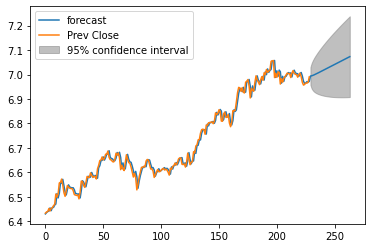

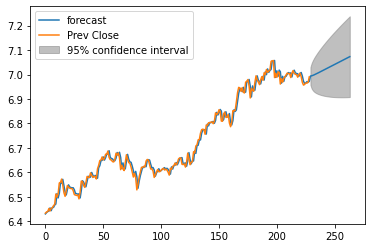

In [34]:
results_arima.plot_predict(1,264)
